In [53]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np


def refactor(dataset, label):
    return dataset[label].apply(lambda x:
                           np.fromstring(
                               x.replace('\n', '')
                                .replace('[', '')
                                .replace(']', '')
                                .replace('  ', ' '), sep=' '))[0]
    
def draw_figure(x, y1, y2, labelx, labely1, labely2):
    fig, host = plt.subplots()
    fig.subplots_adjust(right=0.75)
    par1 = host.twinx()
    par1.set_ylabel(labely2)
    p1, = host.plot(x, y1, label=labely1)
    p2, = par1.plot(x, y2, label=labely2, color='r')
    host.set_ylabel(labely1)
    host.set_xlabel(labelx)
    host.tick_params(axis='y', colors=p1.get_color())
    par1.tick_params(axis='y', colors=p2.get_color())
    plt.grid()
    plt.draw()
    plt.show()
    
def superpose_figure(x1, y1, x2, y2, labelx, labely):
    plt.plot(x1, y1, 'r', label='AS')
    plt.plot(x2, y2, 'b', label='FPO')
    plt.xlabel(labelx)
    plt.ylabel(labely)
    plt.legend(loc='upper left')
    plt.grid()
    plt.draw()
    plt.show()
    

In [54]:
path = os.getcwd()
print(path)
input = pd.read_csv(path + "/Results/analysis_single_input_1-new.csv")
output = pd.read_csv(path + "/Results/analysis_single_output_1-new.csv")
fpo_output = pd.read_excel(
    "/Users/to127534/MDO_Projects/MissionDetails_DOC_Mission.xls", index_col=None)
fpo_output.drop(columns=fpo_output.columns[0],
                axis=1,
                inplace=True)
fpo_output.drop(columns=fpo_output.columns[0],
                axis=1,
                inplace=True)
fpo_output.drop(columns=fpo_output.columns[0],
                axis=1,
                inplace=True)
fpo_output = fpo_output.drop(range(100, 168))
print(fpo_output.shape)
print(fpo_output.columns)
fpo_output.head()


/Users/to127534/MDO_Projects/MDOAirB_base/framework
(100, 21)
Index(['ALT (ft)', 'WGHT (kg)', 'DIST (nm)', 'TIME (mn)', 'FUEL (kg)', 'MACH',
       'CAS (kt)', 'TAS (kt)', 'RATE (ftmn)', 'GRDT (deg)', 'ALPH (deg)',
       'SR (nmkg)', '100CL', '100CD', 'L/D', 'PWS (hp)', 'WFE (kg/h)',
       'FN (dan)', 'SFC (khdn)', 'PCFN (%)', 'DT (dg.c)'],
      dtype='object')


,ALT (ft),WGHT (kg),DIST (nm),TIME (mn),FUEL (kg),MACH,CAS (kt),TAS (kt),RATE (ftmn),GRDT (deg),...,SR (nmkg),100CL,100CD,L/D,PWS (hp),WFE (kg/h),FN (dan),SFC (khdn),PCFN (%),DT (dg.c)
0,0,82206,0.0,0.00,0.0,0.000,0.0,0.0,0.0,0.00,...,0.00000,0.000,0.000,0.000,0,0.0,0,0.0000,0.0,0.0
1,0,82103,0.0,9.00,104.0,0.000,0.0,0.0,0.0,0.00,...,0.00000,0.000,0.000,0.000,0,0.0,0,0.0000,0.0,0.0
2,1500,81908,0.0,11.21,298.0,0.388,250.0,255.3,0.0,0.00,...,0.00000,0.000,0.000,0.000,0,0.0,0,0.0000,0.0,0.0
3,1500,81908,0.0,11.21,298.0,0.388,250.0,255.3,3262.5,7.25,...,0.04275,56.451,2.833,19.925,0,5925.0,14962,0.3960,100.0,0.0
4,2000,81893,0.7,11.37,314.0,0.391,250.0,257.1,3235.7,7.14,...,0.04326,56.502,2.836,19.924,0,5877.0,14808,0.3969,100.0,0.0


In [55]:
input.head()

,WingArea,x1,x2,x3,x4,x5,x6,x7,x8,x9,FanDiameter,x11,x12,x13,x14,x15
0,142.5,135.692308,30.0,25.0,-2.25,38.5,250.0,6.0,3000.0,50.0,25.0,27.0,1350.0,15.0,38000.0,78.0


In [56]:
output.head()

,MTOW,DOC,fuel_mass,total_mission_flight_time,mach,passenger_capacity,SAR,landing_field_length_computed,takeoff_field_length_computed,app_speed,...,mass,time,sfc,thrust,mach.1,CL,CD,LoD,throttle,vcas
0,130973.008668,14293.72072,7120.164965,216.998646,0.82,243.0,8.900206,2271.717821,1754.451849,78.82825,...,[107255.80726297 107255.80726295 107255.807262...,[0.00000000e+00 1.11857975e-10 2.23715950e-10 ...,[ 0.48910022 0.48910022 0.48910022 0.489100...,[1.53076666e+05 1.53076666e+05 1.53076666e+05 ...,[0.43446873 0.43446873 0.43446873 0.43446879 0...,[0.58218259 0.58218259 0.58218259 0.5821826 0...,[0.03101387 0.03101387 0.03101387 0.03101387 0...,[18.77168429 18.77168429 18.77168429 18.771684...,[0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 ...,[280.00000474 280.00000474 280.00000474 280.00...


In [64]:
distance = refactor(output, 'distance')
mass = refactor(output, 'mass')
altitude = refactor(output, 'altitude')
time = refactor(output, 'time')
LoD = refactor(output, 'LoD')
sfc = refactor(output, 'sfc')
CL = refactor(output,'CL')
CD = refactor(output,'CD')
mach = refactor(output,'mach.1')
thrust = refactor(output,'thrust')
throttle = refactor(output, 'throttle')
vcas = refactor(output, 'vcas')

distance_fpo = fpo_output['DIST (nm)'].to_numpy()
mass_fpo = fpo_output['WGHT (kg)'].to_numpy()
altitude_fpo = fpo_output['ALT (ft)'].to_numpy()
time_fpo = fpo_output['TIME (mn)'].to_numpy()
LoD_fpo = fpo_output['L/D'].to_numpy()
sfc_fpo = fpo_output['SFC (khdn)'].to_numpy()
CL_fpo = fpo_output['100CL'].to_numpy()
CD_fpo = fpo_output['100CD'].to_numpy()
mach_fpo = fpo_output['MACH'].to_numpy()
thrust_fpo = fpo_output['FN (dan)'].to_numpy()
throttle_fpo = fpo_output['PCFN (%)'].to_numpy()
vcas_fpo = fpo_output['CAS (kt)'].to_numpy()


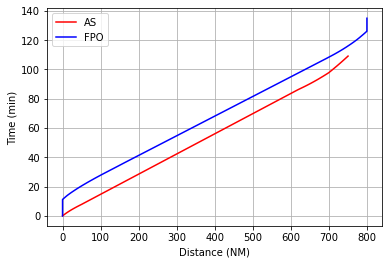

In [65]:
superpose_figure(distance,time, distance_fpo, time_fpo, "Distance (NM)", "Time (min)")

In [66]:
print(distance[-1])
print(time[-1])
print(mass[0]-mass[-1])
print(altitude[0])
print(altitude[-1])


750.421286
109.098646
6754.520167800001
1500.0
314.54889377


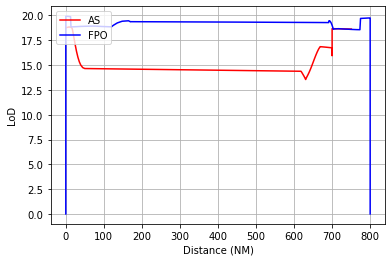

In [67]:
superpose_figure(distance, LoD, distance_fpo,
                 LoD_fpo, "Distance (NM)", "LoD")


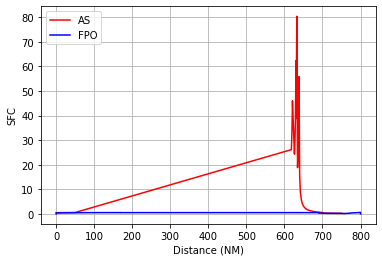

In [68]:
superpose_figure(distance, sfc, distance_fpo,
                 sfc_fpo, "Distance (NM)", "SFC")


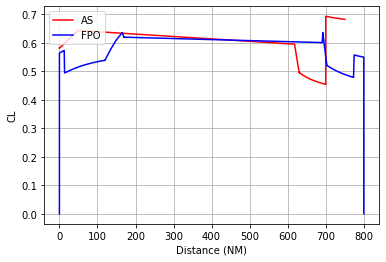

In [69]:
superpose_figure(distance, CL, distance_fpo,
                 CL_fpo/100, "Distance (NM)", "CL")


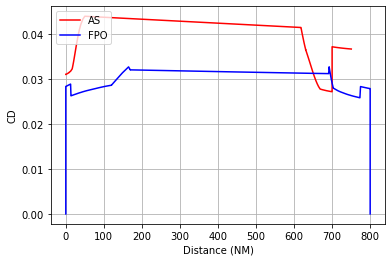

In [70]:
superpose_figure(distance, CD, distance_fpo,
                 CD_fpo/100, "Distance (NM)", "CD")


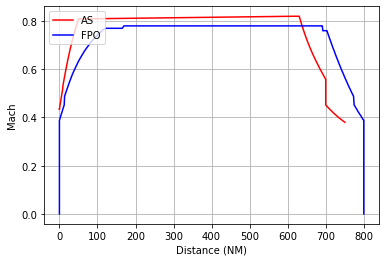

In [71]:
superpose_figure(distance, mach, distance_fpo,
                 mach_fpo, "Distance (NM)", "Mach")

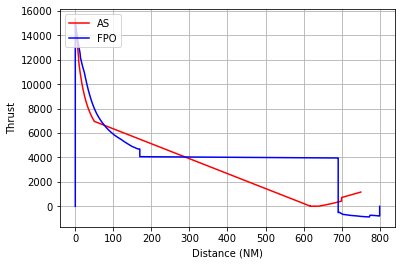

In [72]:
superpose_figure(distance, thrust/10, distance_fpo,
                 thrust_fpo, "Distance (NM)", "Thrust")


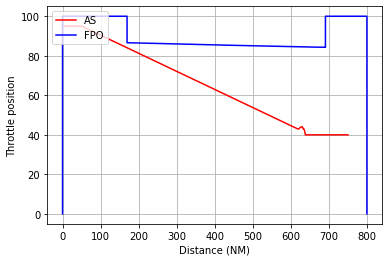

In [73]:
superpose_figure(distance, throttle*100, distance_fpo,
                 throttle_fpo, "Distance (NM)", "Throttle position")

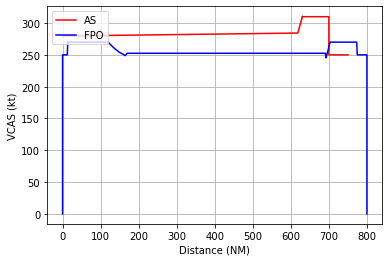

In [74]:
superpose_figure(distance, vcas, distance_fpo,
                 vcas_fpo, "Distance (NM)", "VCAS (kt)")

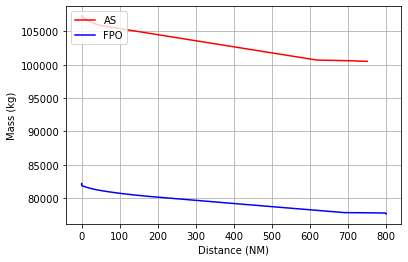

In [75]:
superpose_figure(distance, mass, distance_fpo,
                 mass_fpo, "Distance (NM)", "Mass (kg)")

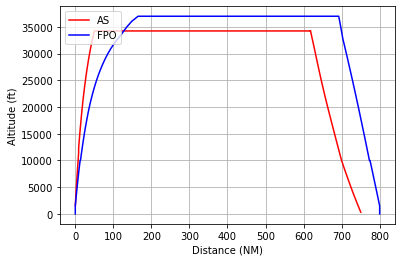

In [79]:
superpose_figure(distance, altitude, distance_fpo,
                 altitude_fpo, "Distance (NM)", "Altitude (ft)")

In [77]:
max(sfc)

80.4157997

In [78]:
sfc

array([ 0.48910022,  0.48910022,  0.48910022,  0.48910024,  0.48910026,
        0.48910042,  0.48910058,  0.48910074,  0.48910235,  0.48910396,
        0.48910557,  0.48912169,  0.4891378 ,  0.48915391,  0.48917003,
        0.48933115,  0.48949226,  0.48965336,  0.48981445,  0.48997553,
        0.49158558,  0.49319409,  0.49480077,  0.49640532,  0.49800746,
        0.4996069 ,  0.51396088,  0.51619369,  0.5162639 ,  0.51633409,
        0.51940027,  0.52244261,  0.52545948,  0.53448894,  0.53527658,
        0.53606043,  0.53684038,  0.53838821,  0.53991928,  0.5414329 ,
        0.54292843,  0.5484197 ,  0.55362439,  0.55853841,  0.56317054,
        0.56753947,  0.57317361,  0.57843057, 26.14834147, 26.14834147,
       26.14834147, 26.14836176, 26.14838204, 26.14858492, 26.1487878 ,
       26.14899069, 26.15101971, 26.15304907, 26.15507875, 26.15710877,
       26.17742716, 26.19777876, 26.21816364, 26.23858188, 26.44461743,
       26.6540813 , 26.86705993, 27.08364265, 29.46971828, 32.34

In [63]:
distance

array([0.00000000e+00, 2.81017648e-13, 5.62035296e-13, 2.81073882e-09,
       5.62091592e-09, 3.37227020e-08, 6.18245182e-08, 8.99263653e-08,
       3.70946503e-07, 6.51969676e-07, 9.32995885e-07, 3.74342493e-06,
       6.55415757e-06, 9.36519369e-06, 1.21765334e-05, 4.03066259e-05,
       6.84670714e-05, 9.66578678e-05, 1.24879013e-04, 1.53130503e-04,
       4.37313870e-04, 7.24528968e-04, 1.01477302e-03, 1.30804304e-03,
       1.60433585e-03, 1.90364807e-03, 4.75892479e-03, 4.75892479e-03,
       4.77396883e-03, 4.78901894e-03, 5.45455404e-03, 6.13169327e-03,
       6.82038094e-03, 9.02481986e-03, 9.24951255e-03, 9.47526770e-03,
       9.70208193e-03, 1.01588742e-02, 1.06198575e-02, 1.10849999e-02,
       1.15542667e-02, 1.33682752e-02, 1.52386951e-02, 1.71631097e-02,
       1.91390619e-02, 2.11641709e-02, 2.40297327e-02, 2.69794152e-02,
       3.33801176e-01, 3.33801176e-01, 3.33801176e-01, 3.33801179e-01,
       3.33801181e-01, 3.33801210e-01, 3.33801238e-01, 3.33801266e-01,
      